In [32]:

""" ########### Starter code for EECS-498-005 Hw-4 problem-4"""

""" The part below creates the dataset used in the problem"""

import numpy as np
from scipy.stats import multivariate_t
from scipy.stats import bernoulli
import matplotlib.pyplot as plt


np.random.seed(0)

def synthetic_ls_data(n, d,kappa):
    mean=np.ones(d)
    cov=np.zeros((d,d))
    for i in range(d):
        for j in range(d):
            cov[i,j]=2*0.5**abs(i-j)
    #T_dist = multivariate_t(loc=mean,shape=cov,df=10)
    #A=T_dist.rvs(size=n, random_state=10)
    A=np.random.randn(n,d)
    u, sigma, vh = np.linalg.svd(A, full_matrices=False)
    sigma = np.linspace(1,kappa,d)
    A = u @ (np.diag(sigma) @ vh)
    x = 1./np.sqrt(d)*np.random.randn(d,1)
    b = A @ x + 100*np.random.randn(n,1) 
    print("Returning Dataset with dimensions " + str(A.shape) + " and condition number: " + str(kappa))
    return A, b

n=2000
d=50
A,b = synthetic_ls_data(n=2000,d=50,kappa=100)

""" Your work starts from here"""

# Manually get optimal solution
def get_optimal_solution(A, b):
    # A: The input matrix of shape (n, d)
    # b: The target vector of shape (n,)
    # Returns:
    # x_opt: The optimal solution of shape (d,)
    
    # YOUR CODE HERE
    x_opt = np.linalg.inv(A.T @ A) @ A.T @ b
    return x_opt

x_star = get_optimal_solution(A, b)

# Construct row-norm sampling probabilities for the given matrix A
def construct_sampling_probabilities(A):
    # A: The input matrix of shape (n, d)
    # Returns:
    # p: The probabilities of sampling each row of A, of shape (n,)
    
    # YOUR CODE HERE
    p = np.linalg.norm(A, axis=1) / np.linalg.norm(A, axis=1).sum()
    return p

# Get the stochastic gradient of the least squares objective at a given point
def stochastic_gradient(A, b, x, p, m):
    # A: The input matrix of shape (n, d)
    # b: The target vector of shape (n,)
    # x: The current point of shape (d,)
    # p: The probabilities of sampling each row of A, of shape (n,)
    # m: The number of rows to sample
    # Returns:
    # g: The stochastic gradient at x of shape (d,)
    
    # YOUR CODE HERE
    n, d = A.shape
    idx = np.random.choice(n, m, p=p) - 1
    g = np.zeros(d)
    for i in idx:
        g += A[i] * (A[i].dot(x) - b[i]) / p[i]
    g /= (m * n)
    return g.reshape(-1, 1)

# Run stochastic gradient

def run_stochastic_gradient_descent(A, b, kappa, m, num_steps, step_size=0.1):
    # A: The input matrix of shape (n, d)
    # b: The target vector of shape (n,)
    # kappa: The condition number of A
    # m: The number of rows to sample
    # num_steps: The number of steps to run the algorithm
    # Returns:
    # residuals: The residuals of the iterates x_t
    
    # YOUR CODE HERE
    n, d = A.shape
    x = np.zeros(d)
    p = construct_sampling_probabilities(A)

    def f(x):
        return np.linalg.norm((A @ x).reshape(-1, 1) - b) ** 2 / (2*n)
    residuals = []
    for t in range(num_steps):
        g = stochastic_gradient(A, b, x, p, m)
        x -= (step_size * g)
        residuals.append((f(x) - f(x_star)) / f(x_star))
    return residuals

T = 10000

def variable_run_stochastic_gradient_descent(A, b, kappa, m, num_steps, step_size=0.1):
    n, d = A.shape
    x = np.zeros(d)
    p = construct_sampling_probabilities(A)

    def f(x):
        return np.linalg.norm((A @ x).reshape(-1, 1) - b) ** 2 / (2*n)
    
    # Divide step size  by 1.2 every 752 steps
    step_size = step_size
    residuals = []
    for t in range(num_steps):
        g = stochastic_gradient(A, b, x, p, m)
        x -= (step_size * g)
        residuals.append((f(x) - f(x_star)) / f(x_star))
        if t % 752 == 0:
            step_size /= 1.2
    return residuals

Returning Dataset with dimensions (2000, 50) and condition number: 100


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


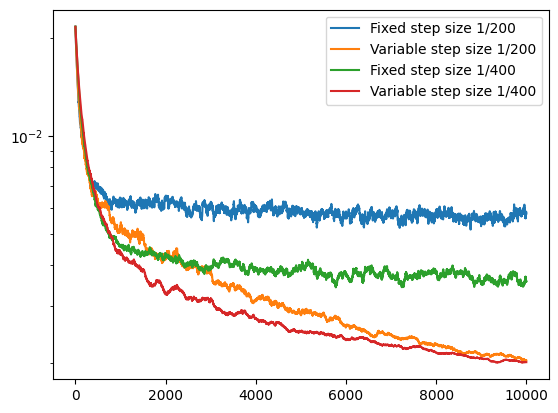

In [143]:
# Run stochastic gradient descent with both stratgies
initial_step_sizes = [1/200, 1/400]

# Run all combinations 50 times each, so four lines
residuals_200_fixed = []
residuals_200_variable = []
residuals_400_fixed = []
residuals_400_variable = []

for i in range(50):
    residuals_200_fixed.append(run_stochastic_gradient_descent(A, b, 100, 50, T, initial_step_sizes[0]))
    print(i)

for i in range(50):
    residuals_200_variable.append(variable_run_stochastic_gradient_descent(A, b, 100, 50, T, initial_step_sizes[0]))
    print(i)

for i in range(50):
    residuals_400_fixed.append(run_stochastic_gradient_descent(A, b, 100, 50, T, initial_step_sizes[1]))
    print(i)

for i in range(50):
    residuals_400_variable.append(variable_run_stochastic_gradient_descent(A, b, 100, 50, T, initial_step_sizes[1]))
    print(i)

# Plot the average residuals
plt.plot(np.mean(residuals_200_fixed, axis=0), label='Fixed step size 1/200')
plt.plot(np.mean(residuals_200_variable, axis=0), label='Variable step size 1/200')
plt.plot(np.mean(residuals_400_fixed, axis=0), label='Fixed step size 1/400')
plt.plot(np.mean(residuals_400_variable, axis=0), label='Variable step size 1/400')
plt.yscale('log')
plt.legend()
plt.show()

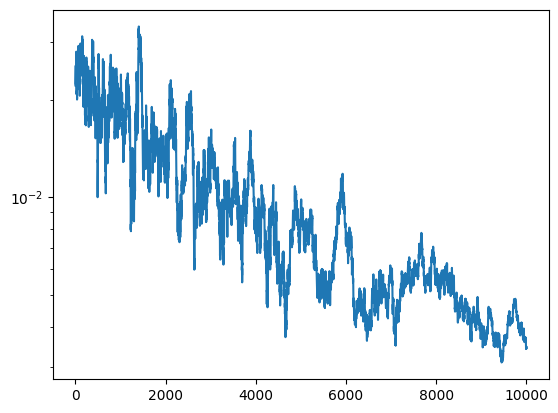

In [141]:
residuals = variable_run_stochastic_gradient_descent(A, b, 100, 10, 10000, 1/200)
plt.plot(residuals)
plt.yscale('log')
plt.show()


In [126]:
np.linalg.norm((A @ x_star).reshape(-1, 1) - b) ** 2 / (2*n)

4807.685709373066

In [1]:
# Compute leverage scores of A
def compute_leverage_scores(A):
    # A: The input matrix of shape (n, d)
    # Returns:
    # leverage_scores: The leverage scores of A, of shape (n,)
    
    # YOUR CODE HERE
    n, d = A.shape
    leverage_scores = []
    for i in range(n):
        leverage_scores.append(A[i].dot(np.linalg.inv(A.T @ A) @ A[i]))
    return leverage_scores

In [5]:
leverage_scores = compute_leverage_scores(A)
# Make probability distribution from leverage scores
leverage_probabilities = leverage_scores / sum(leverage_scores)

In [84]:
# Sparse Rademacher preconditioned fixed step size
def sparse_rademacher_preconditioned_fixed_step_size(A, b, kappa, num_steps, leverage_probabilities, sketch_size, x_0, precond_inv, step_size=0.1):
    # A: The input matrix of shape (n, d)
    # b: The target vector of shape (n,)
    # kappa: The condition number of A
    # num_steps: The number of steps to run the algorithm
    # leverage_probabilities: The leverage scores of A, of shape (n,)
    # sketch_size: The number of rows to sample
    # x_0: The initial point of shape (d,)
    # precond_inv: The inverse of the preconditioner
    # Returns:
    # residuals: The residuals of the iterates x_t
    
    # YOUR CODE HERE
    n, d = A.shape
    x = x_0.copy()
    p = leverage_probabilities

    def f(x):
        return np.linalg.norm((A @ x).reshape(-1, 1) - b) ** 2 / (2*n)
    residuals = []
    for t in range(num_steps):
        g = stochastic_gradient(A, b, x, p, sketch_size)
        x -= (step_size * (precond_inv @ precond_inv.T @ g))
        residuals.append((f(x) - f(x_star)) / f(x_star))
    return residuals

In [85]:
# Preconditioned method using variable step size schedule
def sparse_rademacher_preconditioned_variable_step_size(A, b, kappa, num_steps, leverage_probabilities, sketch_size, x_0, precond_inv, step_size=0.1):
    # A: The input matrix of shape (n, d)
    # b: The target vector of shape (n,)
    # kappa: The condition number of A
    # num_steps: The number of steps to run the algorithm
    # leverage_probabilities: The leverage scores of A, of shape (n,)
    # sketch_size: The number of rows to sample
    # x_0: The initial point of shape (d,)
    # precond_inv: The inverse of the preconditioner
    # Returns:
    # residuals: The residuals of the iterates x_t
    
    # YOUR CODE HERE
    n, d = A.shape
    x = x_0.copy()
    p = leverage_probabilities

    def f(x):
        return np.linalg.norm((A @ x).reshape(-1, 1) - b) ** 2 / (2*n)
    
    # Divide step size  by 1.2 every 752 steps
    step_size = step_size
    residuals = []
    for t in range(num_steps):
        g = stochastic_gradient(A, b, x, p, sketch_size)
        x -= (step_size * (precond_inv @ precond_inv.T @ g))
        residuals.append((f(x) - f(x_star)) / f(x_star))
        if t % 752 == 0:
            step_size /= 1.2
    return residuals

In [8]:
# Create Sparse Rademacher matrix with q = 0.1
def create_sparse_rademacher_matrix(s, d, q):
    # s: The number of rows of the matrix
    # d: The number of columns of the matrix
    # q: The probability of a non-zero entry
    # Returns:
    # M: The sparse Rademacher matrix of shape (s, d)
    
    # YOUR CODE HERE
    M = np.zeros((s, d))
    for i in range(s):
        M[i] = np.random.choice([-1, 0, 1], d, p=[q/2, 1-q, q/2])
    M = M * np.sqrt(10/s)
    return M

In [16]:
# Find the square root of the matrix
def find_sqrt_matrix(A):
    # A: The input matrix of shape (d, d)
    # Returns:
    # sqrt_A: The square root of A
    
    # YOUR CODE HERE
    w, v = np.linalg.eig(A)
    sqrt_A = v @ np.diag(np.sqrt(w)) @ np.linalg.inv(v)
    return sqrt_A

In [86]:
S = create_sparse_rademacher_matrix(100, 2000, 0.1)
A_tilde = S @ A
precond_inv = find_sqrt_matrix(np.linalg.inv(A_tilde.T @ A_tilde))

# Initialize by minimizing |SAx - Sb|^2
x_0 = np.linalg.inv(A_tilde.T @ A_tilde) @ A_tilde.T @ (S @ b)

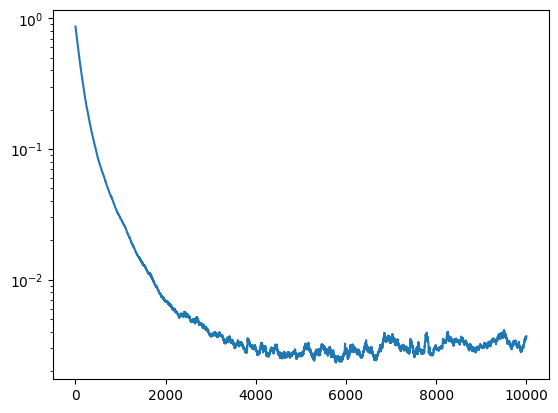

In [87]:
# One run preconditioned SGD
residuals = sparse_rademacher_preconditioned_fixed_step_size(A, b, 100, 10000, leverage_probabilities, 100, x_0, precond_inv, 2)
plt.plot(residuals)
plt.yscale('log')
plt.show()

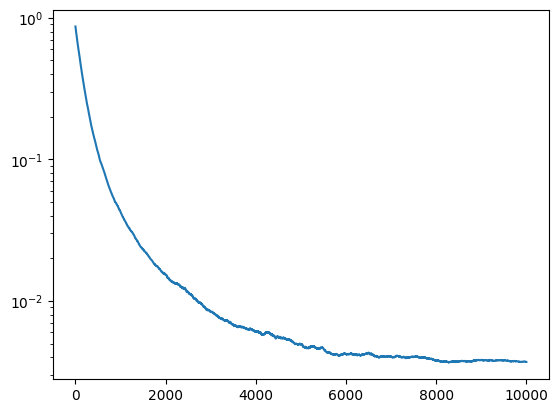

In [88]:
# One run of variable step size preconditioned SGD
residuals = sparse_rademacher_preconditioned_variable_step_size(A, b, 100, 10000, leverage_probabilities, 100, x_0, precond_inv, 2)
plt.plot(residuals)
plt.yscale('log')
plt.show()

In [89]:
# Create another sketch of size 200
S_200 = create_sparse_rademacher_matrix(200, 2000, 0.1)
A_tilde_200 = S_200 @ A
precond_inv_200 = find_sqrt_matrix(np.linalg.inv(A_tilde_200.T @ A_tilde_200))

# Initialize by minimizing |SAx - Sb|^2
x_0_200 = np.linalg.inv(A_tilde_200.T @ A_tilde_200) @ A_tilde_200.T @ (S_200 @ b)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


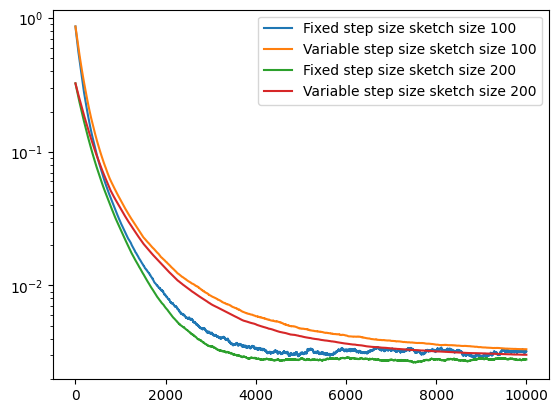

In [90]:
# Create plot of four lines, each sketch with each method, averaged over 50 SGD runs
residuals_precond_fixed_100 = []
residuals_precond_variable_100 = []
residuals_precond_fixed_200 = []
residuals_precond_variable_200 = []

for i in range(50):
    residuals_precond_fixed_100.append(sparse_rademacher_preconditioned_fixed_step_size(A, b, 100, 10000, leverage_probabilities, 100, x_0, precond_inv, 2))
    print(i)

for i in range(50):
    residuals_precond_variable_100.append(sparse_rademacher_preconditioned_variable_step_size(A, b, 100, 10000, leverage_probabilities, 100, x_0, precond_inv, 2))
    print(i)

for i in range(50):
    residuals_precond_fixed_200.append(sparse_rademacher_preconditioned_fixed_step_size(A, b, 100, 10000, leverage_probabilities, 200, x_0_200, precond_inv_200, 2))
    print(i)

for i in range(50):
    residuals_precond_variable_200.append(sparse_rademacher_preconditioned_variable_step_size(A, b, 100, 10000, leverage_probabilities, 200, x_0_200, precond_inv_200, 2))
    print(i)

plt.plot(np.mean(residuals_precond_fixed_100, axis=0), label='Fixed step size sketch size 100')
plt.plot(np.mean(residuals_precond_variable_100, axis=0), label='Variable step size sketch size 100')
plt.plot(np.mean(residuals_precond_fixed_200, axis=0), label='Fixed step size sketch size 200')
plt.plot(np.mean(residuals_precond_variable_200, axis=0), label='Variable step size sketch size 200')
plt.yscale('log')
plt.legend()
plt.show()
